In [608]:
import requests
import json 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [609]:
key = "https://streamscharts.com/api/jazz/channels?platform=twitch&time=7-days"
ids = {'Client-ID': "q9pL9VHxL5HL9jod",'Token':"$2y$10$YxDvJCQsF2XOjKlfBz9UMOnINjpiSyZwvslEGl5p26OljxI2fXG4S"}

In [610]:
response = requests.get(key,headers = ids)

In [611]:
print(response.status_code)

200


In [612]:
data = response.json()

In [613]:
helper = json.loads(json.dumps(data))
df = pd.json_normalize(helper["data"])
df

,platform,channel_name,channel_display_name,channel_id,hours_watched,peak_viewers,average_viewers,airtime_in_m,followers_gain,live_views,last_streamed_game,avatar_url,channel_country,stream_language,partnership_status,channel_type
0,twitch,valorant,VALORANT,490592527,3461943,287228,55025,3775,101624,11232360,VALORANT,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,en,partner,Organization
1,twitch,xqc,xQc,71092938,3332837,127540,65889,3035,10778,6135656,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,CA,en,partner,Male
2,twitch,esl_csgo,ESL_CSGO,31239503,3197969,105277,20745,9250,14507,11007121,Counter-Strike: Global Offensive,https://static-cdn.jtvnw.net/jtv_user_pictures...,None,en,partner,Organization
3,twitch,pgl_dota2en2,PGL_DOTA2EN2,194701696,2767866,95626,42858,3875,33921,6768188,Dota 2,https://static-cdn.jtvnw.net/jtv_user_pictures...,RO,en,partner,Organization
4,twitch,kaicenat,KaiCenat,641972806,2549603,84734,48719,3140,50041,6180386,Just Chatting,https://static-cdn.jtvnw.net/jtv_user_pictures...,US,en,partner,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,twitch,skipnho,SkipNhO,63602976,366666,10958,6760,3255,4139,841350,Virtual Casino,https://static-cdn.jtvnw.net/jtv_user_pictures...,BR,pt,partner,Male
96,twitch,abugoku9999,abugoku9999,264984080,363705,25486,7386,2955,3343,208406,Grand Theft Auto V,https://static-cdn.jtvnw.net/jtv_user_pictures...,DE,de,partner,Male
97,twitch,gotaga,Gotaga,24147592,360965,57208,37342,580,5967,563101,Call of Duty: Modern Warfare II,https://static-cdn.jtvnw.net/jtv_user_pictures...,FR,fr,partner,Male
98,twitch,valorant_kr,valorant_kr,575804071,359309,32836,13433,1605,8268,1489281,VALORANT,https://static-cdn.jtvnw.net/jtv_user_pictures...,KR,ko,partner,Organization


In [614]:
df_clean = df[["channel_name","stream_language","hours_watched","peak_viewers","live_views","airtime_in_m","average_viewers","followers_gain"]]
df_clean

,channel_name,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain
0,valorant,en,3461943,287228,11232360,3775,55025,101624
1,xqc,en,3332837,127540,6135656,3035,65889,10778
2,esl_csgo,en,3197969,105277,11007121,9250,20745,14507
3,pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921
4,kaicenat,en,2549603,84734,6180386,3140,48719,50041
...,...,...,...,...,...,...,...,...
95,skipnho,pt,366666,10958,841350,3255,6760,4139
96,abugoku9999,de,363705,25486,208406,2955,7386,3343
97,gotaga,fr,360965,57208,563101,580,37342,5967
98,valorant_kr,ko,359309,32836,1489281,1605,13433,8268


In [615]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [616]:
df_val = df_clean[["channel_name","stream_language","hours_watched","peak_viewers","live_views","airtime_in_m","average_viewers","followers_gain"]]
df_val

,channel_name,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain
0,valorant,en,3461943,287228,11232360,3775,55025,101624
1,xqc,en,3332837,127540,6135656,3035,65889,10778
2,esl_csgo,en,3197969,105277,11007121,9250,20745,14507
3,pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921
4,kaicenat,en,2549603,84734,6180386,3140,48719,50041
...,...,...,...,...,...,...,...,...
95,skipnho,pt,366666,10958,841350,3255,6760,4139
96,abugoku9999,de,363705,25486,208406,2955,7386,3343
97,gotaga,fr,360965,57208,563101,580,37342,5967
98,valorant_kr,ko,359309,32836,1489281,1605,13433,8268


In [617]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channel_name     100 non-null    object
 1   stream_language  100 non-null    object
 2   hours_watched    100 non-null    int64 
 3   peak_viewers     100 non-null    int64 
 4   live_views       97 non-null     object
 5   airtime_in_m     100 non-null    int64 
 6   average_viewers  100 non-null    int64 
 7   followers_gain   100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [618]:
df_val.isnull().sum()[df_val.isnull().sum()>0]

live_views    3
dtype: int64

In [619]:
df_val.isnull().sum(axis = 1)[df_val.isnull().sum(axis = 1) > 0]

47    1
50    1
77    1
dtype: int64

In [620]:
df_val.dropna(inplace = True)

In [621]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channel_name     97 non-null     object
 1   stream_language  97 non-null     object
 2   hours_watched    97 non-null     int64 
 3   peak_viewers     97 non-null     int64 
 4   live_views       97 non-null     object
 5   airtime_in_m     97 non-null     int64 
 6   average_viewers  97 non-null     int64 
 7   followers_gain   97 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 6.8+ KB


In [622]:
df_val['live_views'] = df_val['live_views'].astype("int") 

In [623]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channel_name     97 non-null     object
 1   stream_language  97 non-null     object
 2   hours_watched    97 non-null     int64 
 3   peak_viewers     97 non-null     int64 
 4   live_views       97 non-null     int32 
 5   airtime_in_m     97 non-null     int64 
 6   average_viewers  97 non-null     int64 
 7   followers_gain   97 non-null     int64 
dtypes: int32(1), int64(5), object(2)
memory usage: 6.4+ KB


In [624]:
df_val

,channel_name,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain
0,valorant,en,3461943,287228,11232360,3775,55025,101624
1,xqc,en,3332837,127540,6135656,3035,65889,10778
2,esl_csgo,en,3197969,105277,11007121,9250,20745,14507
3,pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921
4,kaicenat,en,2549603,84734,6180386,3140,48719,50041
...,...,...,...,...,...,...,...,...
95,skipnho,pt,366666,10958,841350,3255,6760,4139
96,abugoku9999,de,363705,25486,208406,2955,7386,3343
97,gotaga,fr,360965,57208,563101,580,37342,5967
98,valorant_kr,ko,359309,32836,1489281,1605,13433,8268


In [585]:
df_val2 = df_val.set_index("channel_name")
df_val2.to_csv("Data-Set.csv")
df_val2

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain
channel_name,,,,,,,
valorant,en,3461943,287228,11232360,3775,55025,101624
xqc,en,3332837,127540,6135656,3035,65889,10778
esl_csgo,en,3197969,105277,11007121,9250,20745,14507
pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921
kaicenat,en,2549603,84734,6180386,3140,48719,50041
...,...,...,...,...,...,...,...
skipnho,pt,366666,10958,841350,3255,6760,4139
abugoku9999,de,363705,25486,208406,2955,7386,3343
gotaga,fr,360965,57208,563101,580,37342,5967


In [586]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [654]:
df_val0 = df_val2[["hours_watched","airtime_in_m","average_viewers","peak_viewers","live_views","followers_gain"]]
df_val0.describe()

,hours_watched,airtime_in_m,average_viewers,peak_viewers,live_views,followers_gain
count,9.700000e+01,97.000000,97.000000,97.000000,9.700000e+01,97.000000
mean,9.004758e+05,3143.298969,22560.072165,54952.536082,2.524581e+06,13344.639175
std,6.845654e+05,2301.955904,18404.894229,49108.949510,2.096653e+06,20039.274410
min,3.580960e+05,580.000000,2226.000000,4081.000000,2.084060e+05,-2216.000000
25%,4.558540e+05,1680.000000,10626.000000,24707.000000,1.299385e+06,2587.000000
50%,6.091200e+05,2525.000000,15907.000000,39034.000000,1.864556e+06,6301.000000
75%,1.058603e+06,3550.000000,27416.000000,66124.000000,2.974964e+06,14110.000000
max,3.461943e+06,9995.000000,106495.000000,287228.000000,1.123236e+07,112162.000000


In [625]:
df_valhelper = df_val2[["hours_watched","airtime_in_m","average_viewers","peak_viewers","live_views","followers_gain"]]
df_valhelper[["hours_watched","airtime_in_m","average_viewers","peak_viewers","live_views","followers_gain"]] = scaler.fit_transform(df_valhelper)

C:\Users\Jarvis\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [626]:
df_valhelper.describe()

,hours_watched,airtime_in_m,average_viewers,peak_viewers,live_views,followers_gain
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01
mean,-2.289120e-18,-9.156479e-17,1.602384e-16,1.007213e-16,1.144560e-18,2.632488e-17
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00
min,-7.964139e-01,-1.119315e+00,-1.110558e+00,-1.041273e+00,-1.110440e+00,-7.805409e-01
25%,-6.528691e-01,-6.389786e-01,-6.517868e-01,-6.190859e-01,-5.873937e-01,-5.396165e-01
50%,-4.278180e-01,-2.699925e-01,-3.633617e-01,-3.258312e-01,-3.164347e-01,-3.533177e-01
75%,2.321891e-01,1.775941e-01,2.652095e-01,2.286650e-01,2.159263e-01,3.839145e-02
max,3.761180e+00,2.991932e+00,4.584159e+00,4.754370e+00,4.174755e+00,4.956801e+00


C:\Users\Jarvis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jarvis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jarvis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jarvis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

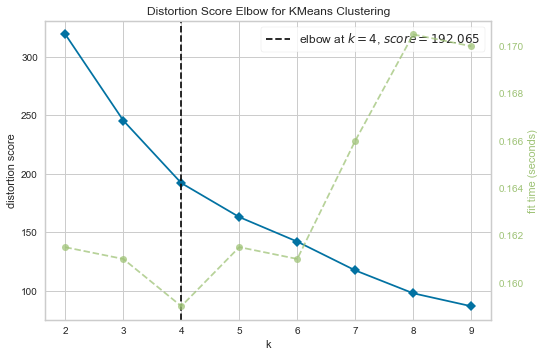

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [627]:
param = ["hours_watched","airtime_in_m","average_viewers","peak_viewers","live_views","followers_gain"]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df_valhelper[param])
visualizer.show()

In [628]:
kmeans4_helper = KMeans(4)
kmeans4_helper.fit(df_valhelper)

C:\Users\Jarvis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [629]:
df_valhelper['cluster'] = kmeans4_helper.labels_

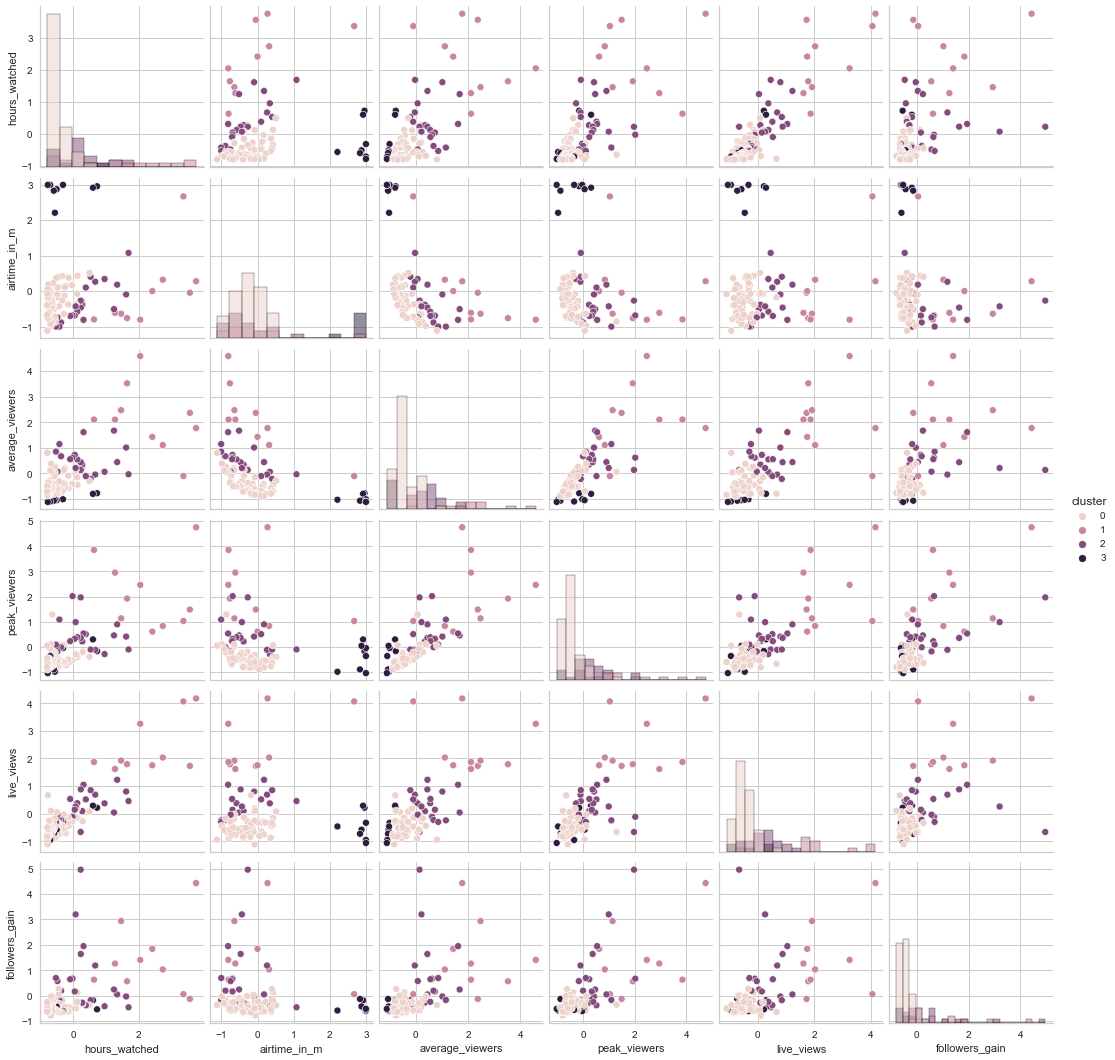

In [630]:
sns.pairplot(df_valhelper[param + ['cluster']], hue = 'cluster',diag_kind = 'hist')

In [631]:
df_cluster_names = df_valhelper.groupby('cluster').mean().T.reset_index()
df_cluster_names

cluster,index,0,1,2,3
0,hours_watched,-0.494747,2.295372,0.374195,-0.264564
1,airtime_in_m,-0.266002,-0.040959,-0.328943,2.843191
2,average_viewers,-0.417644,2.136434,0.512637,-0.988294
3,peak_viewers,-0.475283,2.104336,0.460648,-0.393823
4,live_views,-0.471190,2.422624,0.319739,-0.451468
5,followers_gain,-0.422491,1.402933,0.667296,-0.442260


In [632]:
from ipywidgets import interact

In [633]:
@interact
def cluster_descriptions(cluster = (0,3)):
    sns.barplot(data = df_cluster_names, y='index', x = cluster, orient = 'h')
    plt.show()

interactive(children=(IntSlider(value=1, description='cluster', max=3), Output()), _dom_classes=('widget-inter…

In [635]:
df_val2['label'] = kmeans4_helper.labels_

In [636]:
df_val2

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
valorant,en,3461943,287228,11232360,3775,55025,101624,1
xqc,en,3332837,127540,6135656,3035,65889,10778,1
esl_csgo,en,3197969,105277,11007121,9250,20745,14507,1
pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921,1
kaicenat,en,2549603,84734,6180386,3140,48719,50041,1
...,...,...,...,...,...,...,...,...
skipnho,pt,366666,10958,841350,3255,6760,4139,0
abugoku9999,de,363705,25486,208406,2955,7386,3343,0
gotaga,fr,360965,57208,563101,580,37342,5967,0


In [637]:
df_train = df_val2
df_train

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
valorant,en,3461943,287228,11232360,3775,55025,101624,1
xqc,en,3332837,127540,6135656,3035,65889,10778,1
esl_csgo,en,3197969,105277,11007121,9250,20745,14507,1
pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921,1
kaicenat,en,2549603,84734,6180386,3140,48719,50041,1
...,...,...,...,...,...,...,...,...
skipnho,pt,366666,10958,841350,3255,6760,4139,0
abugoku9999,de,363705,25486,208406,2955,7386,3343,0
gotaga,fr,360965,57208,563101,580,37342,5967,0


In [638]:
df_train['label'] = df_train['label'].astype(str) 

In [639]:
df_train

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
valorant,en,3461943,287228,11232360,3775,55025,101624,1
xqc,en,3332837,127540,6135656,3035,65889,10778,1
esl_csgo,en,3197969,105277,11007121,9250,20745,14507,1
pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921,1
kaicenat,en,2549603,84734,6180386,3140,48719,50041,1
...,...,...,...,...,...,...,...,...
skipnho,pt,366666,10958,841350,3255,6760,4139,0
abugoku9999,de,363705,25486,208406,2955,7386,3343,0
gotaga,fr,360965,57208,563101,580,37342,5967,0


In [640]:
contador = df_train.groupby("label")["hours_watched"]
contador.count()

label
0    58
1    10
2    21
3     8
Name: hours_watched, dtype: int64

In [641]:
df_train[df_train["label"]== "0"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
stylishnoob4,ja,1239612,35700,2688239,4315,17238,5765,0
eliasn97,de,1096930,45147,1952563,2495,26380,6814,0
zackrawrr,en,991497,35260,2223882,4125,14423,15894,0
tsm_imperialhal,en,982737,39034,2909110,2970,19854,8250,0
sodapoppin,en,954803,40639,2285601,2280,25127,3251,0
gorgc,en,875206,28614,1930547,3520,14919,3027,0
summit1g,en,807957,29227,1603623,4010,12090,779,0
jasper7se,ja,804532,24707,1896681,4005,12054,4315,0
lirik,en,799606,30433,2238449,2280,21043,1429,0


In [642]:
df_train[df_train["label"]== "1"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
valorant,en,3461943,287228,11232360,3775,55025,101624,1
xqc,en,3332837,127540,6135656,3035,65889,10778,1
esl_csgo,en,3197969,105277,11007121,9250,20745,14507,1
pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921,1
kaicenat,en,2549603,84734,6180386,3140,48719,50041,1
auronplay,es,2298504,175401,9319628,1295,106495,41381,1
tarik,en,2022980,148878,6261591,1395,87011,24596,1
paulinholokobr,pt,1899032,110427,6537401,1680,67823,71851,1
loud_coringa,pt,1771857,199243,5903392,1740,61099,38528,1


In [643]:
df_train[df_train["label"]== "2"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
fps_shaka,ja,2053848,50070,3477135,5605,21987,4199,2
nix,ru,2004152,75043,4196455,2925,41112,12714,2
pgl_dota2,en,1817692,98714,5087729,3555,30679,14323,2
adinross,en,1750980,77301,2611533,1975,53195,18172,2
trainwreckstv,en,1554303,40965,3304125,3920,23791,5056,2
luquet4,pt,1360640,49437,3962262,3745,21800,36999,2
betboom_ru,ru,1264105,49941,4300194,4065,18659,9803,2
woowakgood,ko,1163307,79764,3604581,3370,20713,5799,2
elspreen,es,1115824,81037,4711467,1285,52101,52182,2


In [644]:
df_train[df_train["label"]== "3"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
gaules,pt,1398028,46891,2974964,9905,8470,2614,3
btssmash,en,1312306,69523,3129138,9815,8023,9707,3
otplol_,fr,688027,52749,1834840,9995,4131,1285,3
mch_agg,pt,555826,57141,1316400,9715,3434,4890,3
jinnytty,en,519145,6792,1558815,8195,3802,1706,3
grubby,en,496472,11250,1004906,9620,3097,10744,3
odablock,en,421997,37271,534970,9995,2534,2234,3
lolworldchampionship,en,370601,4081,309172,9995,2226,3043,3


In [645]:
df_train["label"] = df_train['label'].replace(str(0),'Streams Veteranos')
df_train["label"]= df_train['label'].replace(str(3),'Streams En Crecimiento')
df_train["label"] = df_train['label'].replace(str(2),'Streams Profesionales')
df_train["label"] = df_train['label'].replace(str(1),"Los mejores streams - Top Live Views y Average Views")

In [646]:
df_train

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
valorant,en,3461943,287228,11232360,3775,55025,101624,Los mejores streams - Top Live Views y Average...
xqc,en,3332837,127540,6135656,3035,65889,10778,Los mejores streams - Top Live Views y Average...
esl_csgo,en,3197969,105277,11007121,9250,20745,14507,Los mejores streams - Top Live Views y Average...
pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921,Los mejores streams - Top Live Views y Average...
kaicenat,en,2549603,84734,6180386,3140,48719,50041,Los mejores streams - Top Live Views y Average...
...,...,...,...,...,...,...,...,...
skipnho,pt,366666,10958,841350,3255,6760,4139,Streams Veteranos
abugoku9999,de,363705,25486,208406,2955,7386,3343,Streams Veteranos
gotaga,fr,360965,57208,563101,580,37342,5967,Streams Veteranos


In [647]:
df_train[df_train["label"]== "Los mejores streams - Top Live Views y Average Views"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
valorant,en,3461943,287228,11232360,3775,55025,101624,Los mejores streams - Top Live Views y Average...
xqc,en,3332837,127540,6135656,3035,65889,10778,Los mejores streams - Top Live Views y Average...
esl_csgo,en,3197969,105277,11007121,9250,20745,14507,Los mejores streams - Top Live Views y Average...
pgl_dota2en2,en,2767866,95626,6768188,3875,42858,33921,Los mejores streams - Top Live Views y Average...
kaicenat,en,2549603,84734,6180386,3140,48719,50041,Los mejores streams - Top Live Views y Average...
auronplay,es,2298504,175401,9319628,1295,106495,41381,Los mejores streams - Top Live Views y Average...
tarik,en,2022980,148878,6261591,1395,87011,24596,Los mejores streams - Top Live Views y Average...
paulinholokobr,pt,1899032,110427,6537401,1680,67823,71851,Los mejores streams - Top Live Views y Average...
loud_coringa,pt,1771857,199243,5903392,1740,61099,38528,Los mejores streams - Top Live Views y Average...


In [648]:
df_train[df_train["label"]== "Streams Profesionales"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
fps_shaka,ja,2053848,50070,3477135,5605,21987,4199,Streams Profesionales
nix,ru,2004152,75043,4196455,2925,41112,12714,Streams Profesionales
pgl_dota2,en,1817692,98714,5087729,3555,30679,14323,Streams Profesionales
adinross,en,1750980,77301,2611533,1975,53195,18172,Streams Profesionales
trainwreckstv,en,1554303,40965,3304125,3920,23791,5056,Streams Profesionales
luquet4,pt,1360640,49437,3962262,3745,21800,36999,Streams Profesionales
betboom_ru,ru,1264105,49941,4300194,4065,18659,9803,Streams Profesionales
woowakgood,ko,1163307,79764,3604581,3370,20713,5799,Streams Profesionales
elspreen,es,1115824,81037,4711467,1285,52101,52182,Streams Profesionales


In [649]:
df_train[df_train["label"]== "Streams Veteranos"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
stylishnoob4,ja,1239612,35700,2688239,4315,17238,5765,Streams Veteranos
eliasn97,de,1096930,45147,1952563,2495,26380,6814,Streams Veteranos
zackrawrr,en,991497,35260,2223882,4125,14423,15894,Streams Veteranos
tsm_imperialhal,en,982737,39034,2909110,2970,19854,8250,Streams Veteranos
sodapoppin,en,954803,40639,2285601,2280,25127,3251,Streams Veteranos
gorgc,en,875206,28614,1930547,3520,14919,3027,Streams Veteranos
summit1g,en,807957,29227,1603623,4010,12090,779,Streams Veteranos
jasper7se,ja,804532,24707,1896681,4005,12054,4315,Streams Veteranos
lirik,en,799606,30433,2238449,2280,21043,1429,Streams Veteranos


In [651]:
df_train[df_train["label"]== "Streams En Crecimiento"]

,stream_language,hours_watched,peak_viewers,live_views,airtime_in_m,average_viewers,followers_gain,label
channel_name,,,,,,,,
gaules,pt,1398028,46891,2974964,9905,8470,2614,Streams En Crecimiento
btssmash,en,1312306,69523,3129138,9815,8023,9707,Streams En Crecimiento
otplol_,fr,688027,52749,1834840,9995,4131,1285,Streams En Crecimiento
mch_agg,pt,555826,57141,1316400,9715,3434,4890,Streams En Crecimiento
jinnytty,en,519145,6792,1558815,8195,3802,1706,Streams En Crecimiento
grubby,en,496472,11250,1004906,9620,3097,10744,Streams En Crecimiento
odablock,en,421997,37271,534970,9995,2534,2234,Streams En Crecimiento
lolworldchampionship,en,370601,4081,309172,9995,2226,3043,Streams En Crecimiento
